In [1]:
import numpy as np
import pandas as pd

In [2]:
class ScratchLinearRegression():
    """
    Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    
    Attributes
    ----------
    self.coef_ : ndarray, shape (n_features,)
      Parameters
    self.loss : ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : ndarray, shape (self.iter,)
      Record loss on validation data
    """
    
    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn linear regression. If validation data is entered, 
        the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : ndarray, shape (n_samples,)
            Correct value of verification data
        """
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        if not self.no_bias:
            # Append bias column to X
            X = np.hstack([np.ones([n_samples, 1]), X])
        
        # Prepare theta for hypotheis function
        self.theta = np.random.rand(n_features + (1 - self.no_bias))
        
        for i in range(self.iter):
            y_hyp = self._linear_hypothesis(X)
            self.theta = self._gradient_descent(X, y, y_hyp)
            self.loss[i] = self._loss_function(y_hyp, y)
            
            if X_val is not None and y_val is not None:
                y_predict = self.predict(X_val)
                self.val_loss[i] = self._loss_function(y_predict, y_val)
                
        if self.verbose:
            #Output learning process when verbose is set to True
            print("Loss: {}".format(self.loss))
            print("Val_loss: {}".format(self.val_loss))
        pass
        
    def predict(self, X):
        """
        Estimate using linear regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            ndarray, shape (n_samples, 1)
            Estimated result by linear regression
        """
        if not self.no_bias:
            n_samples = X.shape[0]
            X = np.hstack([np.ones([n_samples, 1]), X])
        return np.dot(X, self.theta.T)
    
    def _linear_hypothesis(self, X):
        """
        Compute a linear hypothetical function
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          Training data
        Returns
        -------
          ndarray, shape (n_samples, 1)
          Estimated result by linear hypothetical function
        """
        y_hyp = np.dot(X, self.theta.T)
        return y_hyp
    
    def _gradient_descent(self, X, y, y_hyp):
        """
        Update new theta j in the steepest decent method
        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            Training data
        y: ndarray, shape (n_samples,)
            Correct answer value of training data
        y_hyp: ndarray, shape (n_samples, 1)
        Returns
        -------
        update_theta: ndarray, shape (n_features, 1)
          New theta value
        """
        n_samples = X.shape[0]
        update_theta = self.theta - (self.lr * np.dot((y_hyp - y), X) / n_samples)
        return update_theta
    
    def _loss_function(self, y_pred, y):
        """
        Calculation of objective function.
        Parameters
        ----------
        y_pred : The following forms of ndarray, shape (n_samples,)
          Estimated value
        y : The following forms of ndarray, shape (n_samples,)
          Correct answer value
        Returns
        ----------
        loss: numpy.float
          Result of the loss function
        """
        loss = np.mean((y_pred - y) ** 2)
        return loss
        

def MSE(y_pred, y):
    """
    Calculation of mean square error
    Parameters
    ----------
    y_pred : The following forms of ndarray, shape (n_samples,)
      Estimated value
    y : The following forms of ndarray, shape (n_samples,)
      Correct answer value
    Returns
    ----------
    mse : numpy.float
      Mean squared error
    """
    n_samples = y.shape[0]
    mse = np.mean((y_pred - y)[1:] ** 2)
    return mse

In [3]:
X = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10]
])
X.shape


(5, 2)

In [4]:
# Let y = 2x1 + 1x2
y = np.array([4, 10, 16, 22, 28])
y.shape

(5,)

In [5]:
slr = ScratchLinearRegression(100, 0.01, False, True)

In [6]:
theta = slr.fit(X, y)

Loss: [1.47705428e+02 7.42814931e+00 4.46246208e-01 9.82932041e-02
 8.05066650e-02 7.91550007e-02 7.86241574e-02 7.81370250e-02
 7.76549101e-02 7.71758694e-02 7.66997888e-02 7.62266452e-02
 7.57564204e-02 7.52890963e-02 7.48246550e-02 7.43630788e-02
 7.39043499e-02 7.34484508e-02 7.29953640e-02 7.25450723e-02
 7.20975582e-02 7.16528048e-02 7.12107950e-02 7.07715118e-02
 7.03349385e-02 6.99010583e-02 6.94698546e-02 6.90413108e-02
 6.86154107e-02 6.81921379e-02 6.77714761e-02 6.73534093e-02
 6.69379215e-02 6.65249967e-02 6.61146191e-02 6.57067731e-02
 6.53014430e-02 6.48986133e-02 6.44982685e-02 6.41003934e-02
 6.37049727e-02 6.33119912e-02 6.29214339e-02 6.25332859e-02
 6.21475323e-02 6.17641584e-02 6.13831493e-02 6.10044907e-02
 6.06281679e-02 6.02541665e-02 5.98824723e-02 5.95130710e-02
 5.91459484e-02 5.87810905e-02 5.84184833e-02 5.80581130e-02
 5.76999657e-02 5.73440278e-02 5.69902856e-02 5.66387255e-02
 5.62893341e-02 5.59420980e-02 5.55970039e-02 5.52540387e-02
 5.49131891e-02 5.

In [7]:
slr_predict = slr.predict(X)
slr_predict

array([ 4.35911072, 10.22675535, 16.09439997, 21.96204459, 27.82968922])

In [8]:
MSE(y, slr_predict)

0.02269392941806149

In [9]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
X = df[['GrLivArea']].values
y = df['SalePrice'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1095, 1) (365, 1) (1095,) (365,)


In [12]:
X[:5]

array([[1710],
       [1262],
       [1786],
       [1717],
       [2198]], dtype=int64)

In [13]:
y[:5]

array([208500, 181500, 223500, 140000, 250000], dtype=int64)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
slr_house = ScratchLinearRegression()
slr_house.fit(X_train_scaled, y_train, X_test_scaled, y_test)
y_house_predict = slr_house.predict(X_test_scaled)

pd.DataFrame([y_house_predict, y_test])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,136936.686931,205651.638184,267454.434576,160519.332923,195181.756558,113760.638284,149541.204617,176783.226711,209311.014286,188676.199043,...,113760.638284,267861.031921,215918.221137,174140.34397,239094.269784,185931.666966,175563.434677,184610.225596,166719.94243,177393.122728
1,88000.000000,212000.000000,325300.000000,254000.000000,227000.000000,129900.000000,164000.000000,213000.000000,189000.000000,272000.000000,...,58500.000000,129000.000000,124900.000000,97500.00000,274300.000000,232000.000000,160000.000000,277500.000000,166000.00000,184000.000000


In [16]:
MSE(y_house_predict, y_test)

3109017740.405539

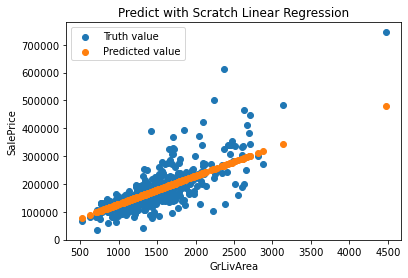

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Predict with Scratch Linear Regression')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test, y_test, label='Truth value')
plt.scatter(X_test, y_house_predict, label='Predicted value')
plt.legend()
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_predict = lr.predict(X_test_scaled)

pd.DataFrame([lr_predict, y_test], index=['Predicted value', 'Truth value'])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
Predicted value,136942.598904,205660.51675,267465.981323,160526.263017,195190.183114,113765.549689,149547.660757,176790.858957,209320.050837,188684.344738,...,113765.549689,267872.596221,215927.542938,174147.862117,239104.592152,185939.694173,175571.014261,184618.195753,166727.140219,177400.781305
Truth value,88000.000000,212000.00000,325300.000000,254000.000000,227000.000000,129900.000000,164000.000000,213000.000000,189000.000000,272000.000000,...,58500.000000,129000.000000,124900.000000,97500.000000,274300.000000,232000.000000,160000.000000,277500.000000,166000.000000,184000.000000


In [19]:
mean_squared_error(y_test, lr_predict)

3106949925.627036

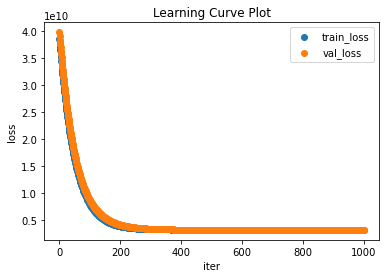

In [20]:
plt.title('Learning Curve Plot')
plt.xlabel('iter')
plt.ylabel('loss')
plt.scatter(range(slr_house.iter), slr_house.loss, label='train_loss')
plt.scatter(range(slr_house.iter), slr_house.val_loss, label='val_loss')
plt.legend()
plt.show()


In [21]:
slr_nobias = ScratchLinearRegression(no_bias=True)
slr_nobias.fit(X_train_scaled, y_train)
slr_nobias_predict = slr_nobias.predict(X_test_scaled)

pd.DataFrame([slr_nobias_predict, y_test], index=['Predict value', 'Truth value'])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
Predict value,-43181.102144,25533.849086,87336.645458,-19598.45616,15063.967463,-66357.150783,-30576.584463,-3334.562378,29193.225187,8558.409951,...,-66357.150783,87743.242802,35800.432036,-5977.445117,58976.480675,5813.877875,-4554.354411,4492.436505,-13397.846655,-2724.666361
Truth value,88000.000000,212000.000000,325300.000000,254000.00000,227000.000000,129900.000000,164000.000000,213000.000000,189000.000000,272000.000000,...,58500.000000,129000.000000,124900.000000,97500.000000,274300.000000,232000.000000,160000.000000,277500.000000,166000.000000,184000.000000


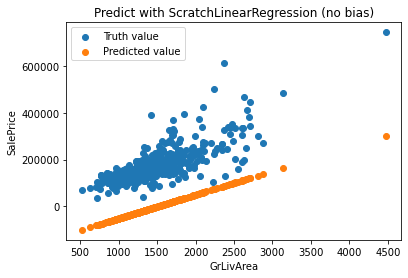

In [22]:
plt.title('Predict with ScratchLinearRegression (no bias)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test, y_test, label='Truth value')
plt.scatter(X_test, slr_nobias_predict, label='Predicted value')
plt.legend()
plt.show()

In [23]:
X = df[['GrLivArea', 'YearBuilt']].values
y = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1095, 2) (365, 2) (1095,) (365,)


In [24]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


slr_house = ScratchLinearRegression()
slr_house.fit(X_train_scaled, y_train, X_test_scaled, y_test)
y_house_predict = slr_house.predict(X_test_scaled)

pd.DataFrame([y_house_predict, y_test])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,213151.967707,177310.975552,139762.202379,260411.482637,131929.735159,255837.343117,214276.893143,132736.516622,214110.206801,215805.20931,...,213056.524516,215490.259965,88433.158557,132251.686309,86831.017163,103186.284461,147403.783216,206688.744669,242868.27366,133780.002476
1,190000.000000,186700.000000,148000.000000,284000.000000,82000.000000,253000.000000,214000.000000,154500.000000,178000.000000,259000.00000,...,282922.000000,177500.000000,81000.000000,129000.000000,64500.000000,107500.000000,140000.000000,146000.000000,280000.00000,145000.000000


In [25]:
MSE(y_house_predict, y_test)

2398291058.840334

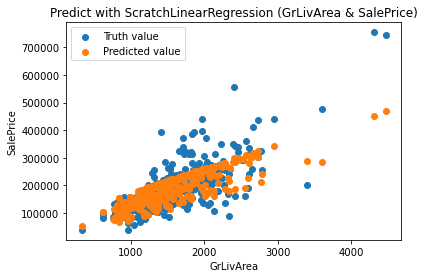

 -----------------------------------------------------------------


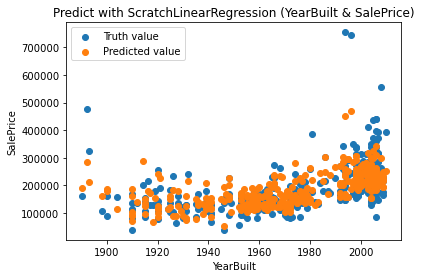

In [26]:
plt.title('Predict with ScratchLinearRegression (GrLivArea & SalePrice)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test[:, 0], y_test, label='Truth value')
plt.scatter(X_test[:, 0], y_house_predict, label='Predicted value')
plt.legend()
plt.show()

print(" -----------------------------------------------------------------")


plt.title('Predict with ScratchLinearRegression (YearBuilt & SalePrice)')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.scatter(X_test[:, 1], y_test, label='Truth value')
plt.scatter(X_test[:, 1], y_house_predict, label='Predicted value')
plt.legend()
plt.show()